In [114]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import math 
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import random 

In [2]:
df = pd.read_csv("ANANTRAJ.NS.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-31,74.449997,77.449997,73.300003,77.349998,77.168175,1688897
1,2022-01-03,78.000000,78.599998,76.000000,76.500000,76.320175,465687
2,2022-01-04,77.099998,77.150002,74.349998,75.150002,74.973351,335717
3,2022-01-05,75.150002,77.000000,73.500000,74.449997,74.274994,355993
4,2022-01-06,73.550003,75.400002,72.500000,74.349998,74.175232,203930


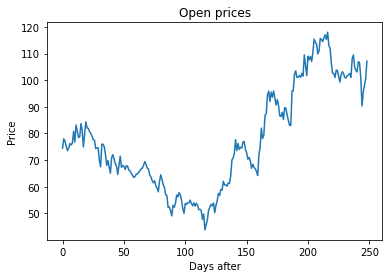

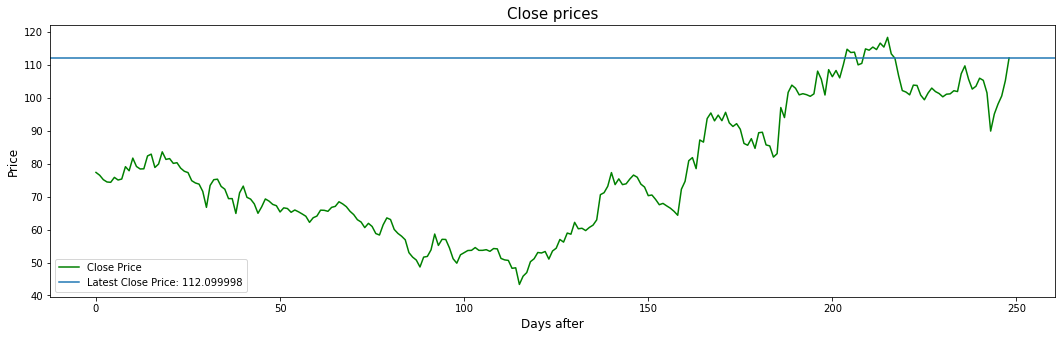

In [4]:
open_prices = df['Open']
close_prices = df['Close']

plt.title("Open prices")
plt.xlabel("Days after")
plt.ylabel("Price")
plt.plot(open_prices)
plt.show()


plt.figure(figsize=(18, 5))
plt.title("Close prices", fontsize=15)
plt.xlabel("Days after", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.plot(close_prices, 'g', label='Close Price')
plt.axhline(y=close_prices[len(close_prices) - 1], label=f'Latest Close Price: {close_prices[len(close_prices) - 1]}')
plt.legend()
plt.savefig("graphed-results/close-price")
plt.show()

In [5]:
len(close_prices)

249

## Applying indicators to predict the general trend of the stock 

## First Metric :- Relative Strength Index (RSI) 

Equation to compute the RSI of a stock 
RSI = 100 – (100 / [1 +RS])

Resource :- https://www.wallstreetmojo.com/relative-strength-index/

### Start

In [6]:
# Computing the losses and the gains 
close_prices = close_prices.to_list()

In [7]:
import pandas_ta as pta
relative_strength_indexs = pta.rsi(df['Close'], length = 14).to_list()

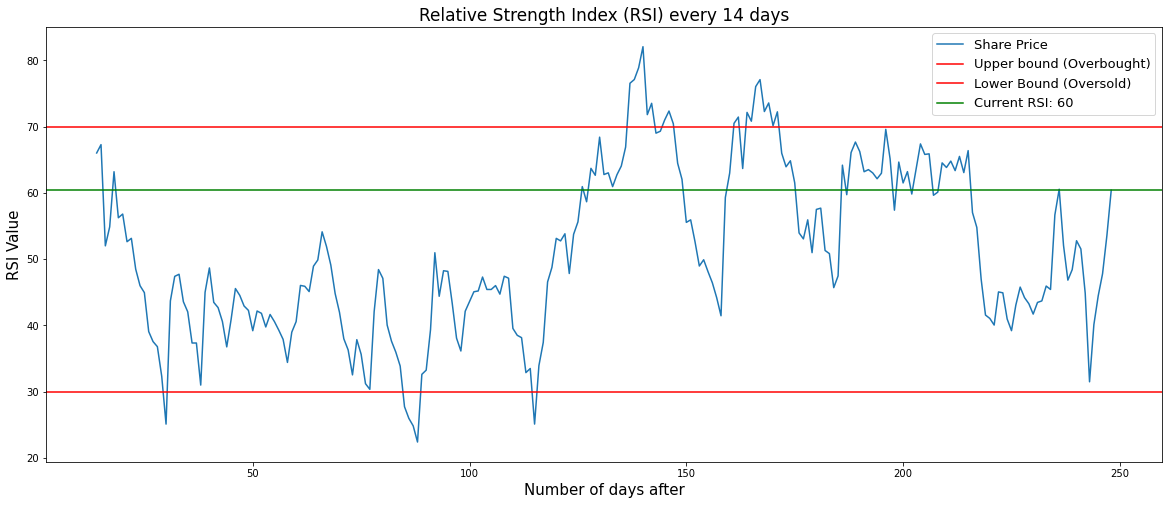

In [8]:
import matplotlib.pyplot as plt 
# %matplotlib notebook

plt.figure(figsize=(20, 8))
# plt.figure(figsize=(10, 5)) # This is when matplotlib notebook is activated
plt.plot(relative_strength_indexs, label='Share Price')
plt.axhline(y=70, color='r', label='Upper bound (Overbought)')
plt.axhline(y=30, color='r', label='Lower Bound (Oversold)')
plt.axhline(y=relative_strength_indexs[-1], color='g', label=f'Current RSI: {round(relative_strength_indexs[-1])}')
plt.title("Relative Strength Index (RSI) every 14 days", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("RSI Value", fontsize=15)
plt.legend(prop = {'size' : 13})
plt.savefig("graphed-results/RSI")
plt.show()

### End

## Creating Bollinger Bands

Simple Moving Average Equation + std 2

### start

In [9]:
import statistics

close_avg = df['Close'].rolling(5).mean()
standard_deviations = df['Close'].rolling(5).std()

upper_bollinger_band = []
lower_bollinger_band = []

for i in range(len(standard_deviations)):
    upper_bound = close_avg[i] + (standard_deviations[i] * 2)
    lower_bound = close_avg[i] - (standard_deviations[i] * 2)
    
    upper_bollinger_band.append(upper_bound)
    lower_bollinger_band.append(lower_bound)

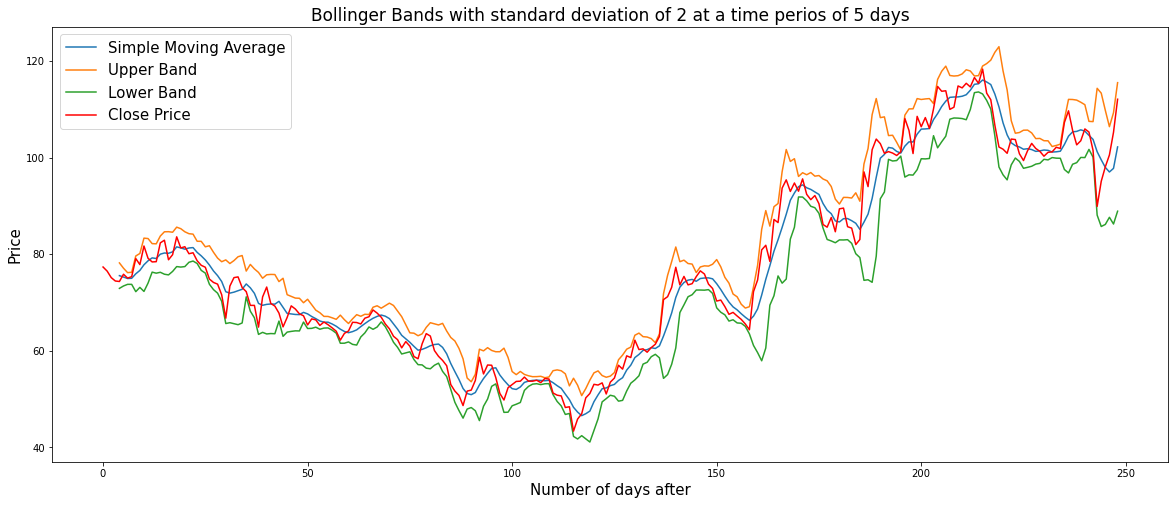

In [10]:
import matplotlib.pyplot as plt 


# Uncomment for interactive graphs
# %matplotlib notebook

plt.figure(figsize=(20, 8))
plt.plot(close_avg, label='Simple Moving Average')
plt.plot(upper_bollinger_band, label='Upper Band')
plt.plot(lower_bollinger_band, label='Lower Band')
plt.plot(close_prices, 'r', label='Close Price')
plt.title(r"Bollinger Bands with standard deviation of 2 at a time perios of 5 days", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA + Bollinger Bands")
plt.show()

### end

## OBV :- On Balance Volume

In [11]:
volumes = df['Volume'].to_list()

In [12]:
on_balance_volumes = []
obv = 0

on_balance_volumes.append(obv)

for i in range(1, len(volumes)):
    if close_prices[i] > close_prices[i - 1]:
        obv += volumes[i]
        on_balance_volumes.append(obv)
        
    elif close_prices[i] < close_prices[i - 1]:
        obv -= volumes[i]
        on_balance_volumes.append(obv)
        
    else:
        obv += 0
        on_balance_volumes.append(obv)   
    

In [13]:
NUM_OF_DAYS_2 = 5
obv_df = pd.DataFrame(on_balance_volumes)
obv_sma = obv_df.rolling(NUM_OF_DAYS_2).mean()

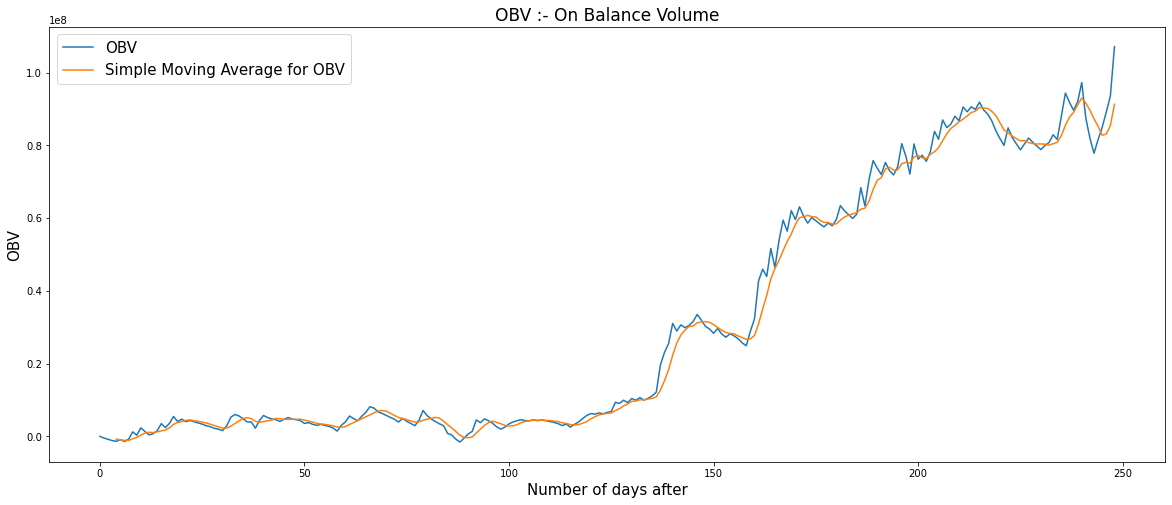

In [14]:
plt.figure(figsize=(20, 8))
plt.plot(on_balance_volumes, label='OBV')
plt.plot(obv_sma, label='Simple Moving Average for OBV')
plt.title("OBV :- On Balance Volume", fontsize=17)
plt.xlabel("Number of days after", fontsize=15)
plt.ylabel("OBV", fontsize=15)
plt.legend(prop = {'size' : 15})
plt.savefig("graphed-results/SMA(OBV) + OBV")
plt.show()

## Implementing MACD (Moving Average Convergence Divergence)

### Equation for MACD 
MACD=12-Period EMA − 26-Period EMA

In [15]:
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = ema12 - ema26

# Signal line of macd
signal = macd.ewm(span=9, adjust=False).mean()

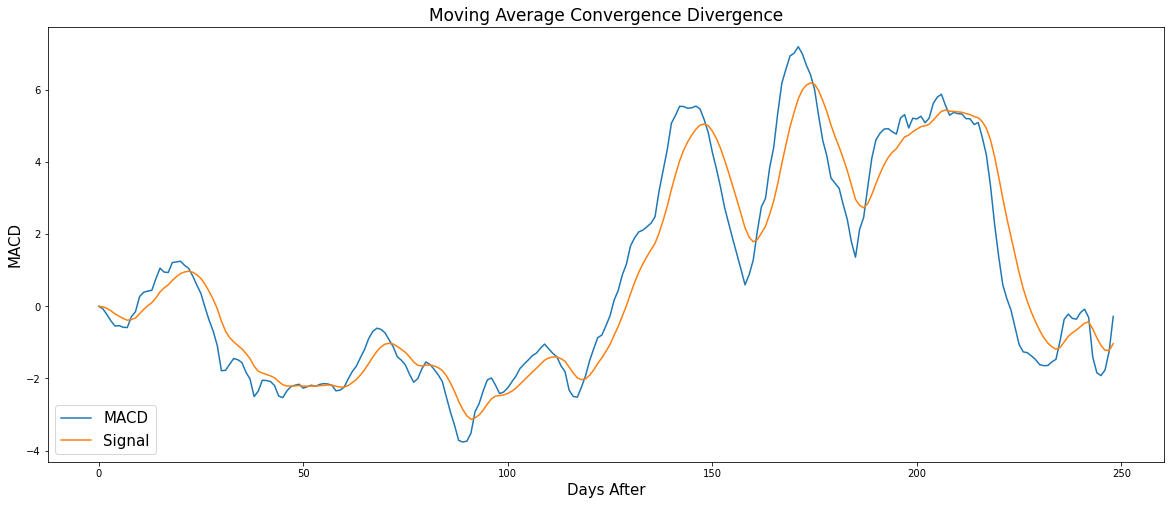

In [16]:
plt.figure(figsize=(20, 8))
plt.plot(macd, label='MACD')
plt.plot(signal, label='Signal')
plt.title("Moving Average Convergence Divergence", fontsize=17)
plt.ylabel("MACD", fontsize=15)
plt.xlabel("Days After", fontsize=15)
plt.legend(prop = {'size' : 15}, loc = 'lower left')
plt.savefig("graphed-results/MACD")
plt.show()

## Resistance and Support Lines

In [17]:
high_prices = df['High'].to_list()
low_prices = df['Low'].to_list()

### Computing the pivots Using the equation Pivot Point = (Previous Session High + Previous Session Low + Previous Session Close)/3

In [18]:
pivot_points = []

for i in range(len(close_prices)):
    if i == 0:
        pivot_points.append(float("nan"))
    else:
        prev_high = high_prices[i-1]
        prev_low = low_prices[i-1]
        prev_close = close_prices[i-1]
        
        pivot_point = (prev_high + prev_low + prev_close) / 3
        pivot_points.append(pivot_point)

### Computing the Resistance and Support levels using the equations below -


##### Resistance Level 1 = (2 x Pivot Point) – Previous Session Low
##### Support Level 1 – (2 x Pivot Point) – Previous High
##### Resistance Level 2 = (Pivot Point – Support Level 1) + Resistance Level 1 
##### Support Level 2 = Pivot Point – (Resistance Level 1 – Support Level 1) 
##### Resistance Level 3 = (Pivot Point – Support Level 2) + Resistance Level 2 
##### Support Level 3 = Pivot Point – (Resistance Level 2 – Support Level 2) 

In [19]:
resistance_1 = []
support_1 = []
resistance_2 = []
support_2 = []


for i in range(len(pivot_points)):
    if i == 0:
        resistance_1.append(float("nan"))
        support_1.append(float("nan"))
    else:
        r1 = (2 * pivot_points[i]) - low_prices[i-1]
        s1 = (2 * pivot_points[i]) - high_prices[i-1]
        
        r2 = (pivot_points[i] - s1) + r1
        s2 = pivot_points[i] - (r1 - s1)
        
        resistance_1.append(r1)
        support_1.append(s1)
        resistance_2.append(r2)
        support_2.append(s2)

In [20]:
print(len(support_1))
print(len(close_prices))

249
249


In [21]:
first_support_cross_counter = 0 

for i in range(len(support_1)):
    if support_1[i] > close_prices[i]:
        first_support_cross_counter += 1
        
        
print(first_support_cross_counter)

50


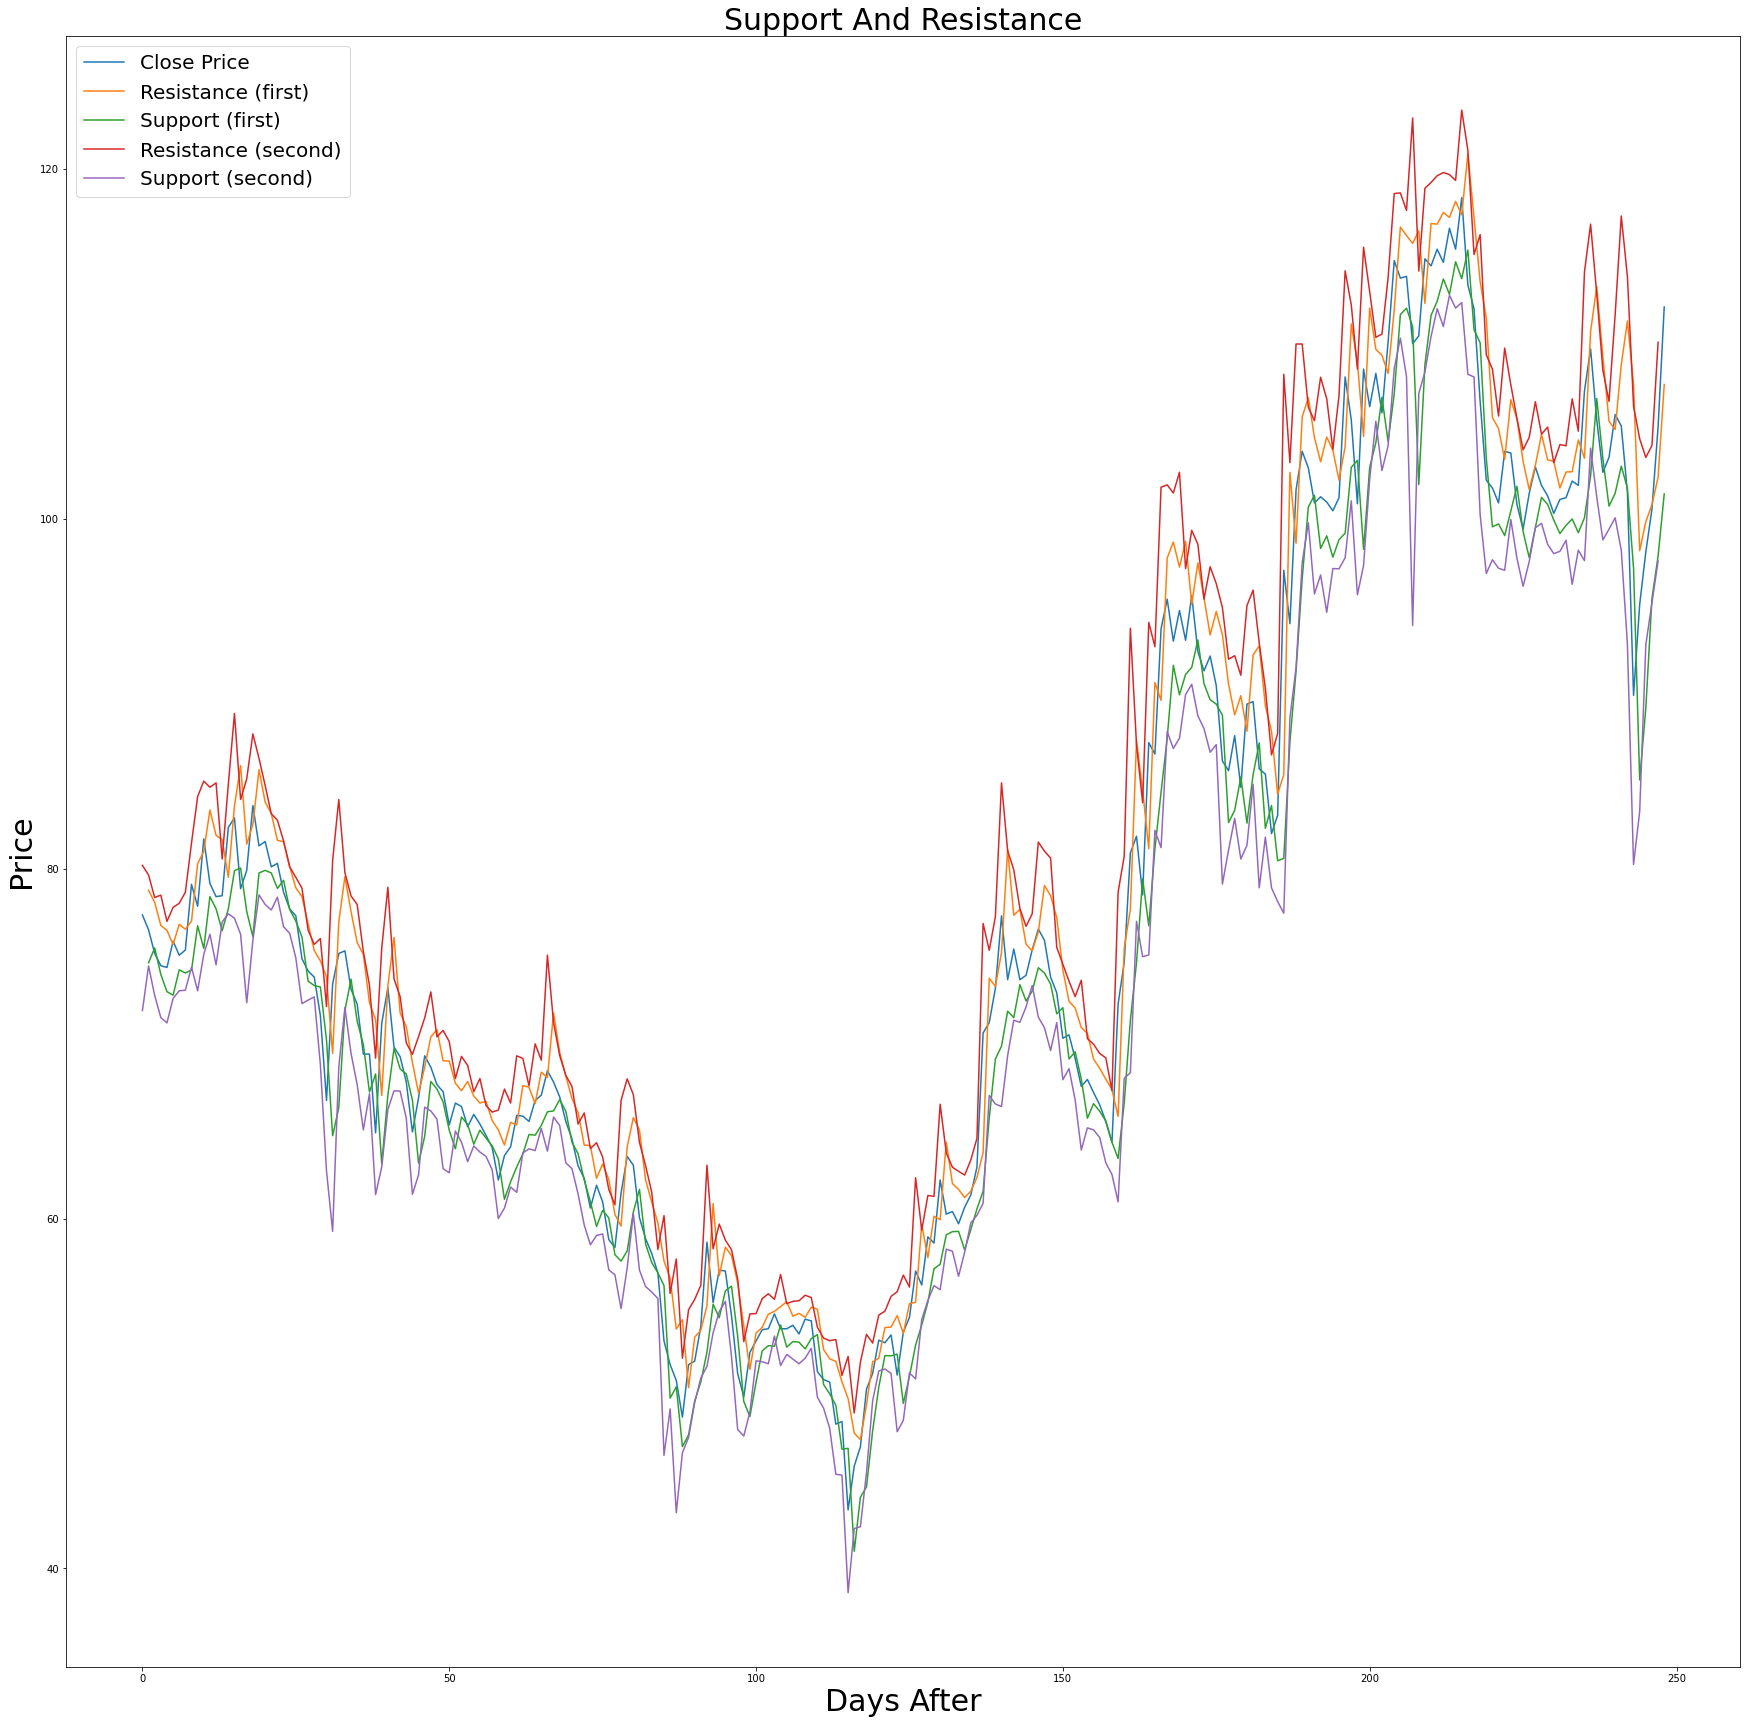

In [22]:
plt.figure(figsize=(30, 30))
plt.plot(close_prices, label='Close Price')
plt.plot(resistance_1, label='Resistance (first)')
plt.plot(support_1, label='Support (first)')
plt.plot(resistance_2, label='Resistance (second)')
plt.plot(support_2, label='Support (second)')
plt.xlabel("Days After", fontsize=30)
plt.ylabel("Price", fontsize=30)
plt.title("Support And Resistance", fontsize=30)
plt.legend(prop = {'size' : 20})
plt.savefig("graphed-results/support and resistance")
plt.show()

## Neural Network to predict the future

In [23]:
dataset = close_prices

dataset = np.array(dataset)
training = len(dataset)

In [24]:
dataset = np.reshape(dataset, (dataset.shape[0], 1))

In [25]:
dataset.shape

(249, 1)

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
print(len(train_data))
# prepare feature and labels
x_train = []
y_train = []
prediction_days = 60

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


249


In [63]:
x_train.shape

(189, 60, 1)

## LSTM Approach

In [64]:
# RNN Using LSTMs

# SAMPLE HIGH ACCURACY MODEL
# ---------------------------------
model_rnn = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(units=75,
                    return_sequences=True,
                    input_shape=(x_train.shape[1], 1))), 
    keras.layers.Bidirectional(keras.layers.LSTM(units=64)),
    keras.layers.Dense(300),
    keras.layers.Dense(32),
    keras.layers.Dense(1),
])
# ---------------------------------


In [65]:
model_rnn.compile(optimizer='adam',
            loss='mse')
history = model_rnn.fit(x_train,
                    y_train,
                    epochs=20, 
                    batch_size=5)


Epoch 1/20
38/38 [==============================] - 7s 38ms/step - loss: 0.0294
Epoch 2/20
38/38 [==============================] - 1s 39ms/step - loss: 0.0070
Epoch 3/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0047
Epoch 4/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0045
Epoch 5/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0061
Epoch 6/20
38/38 [==============================] - 2s 44ms/step - loss: 0.0073
Epoch 7/20
38/38 [==============================] - 2s 49ms/step - loss: 0.0068
Epoch 8/20
38/38 [==============================] - 2s 50ms/step - loss: 0.0040
Epoch 9/20
38/38 [==============================] - 2s 51ms/step - loss: 0.0040
Epoch 10/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0033
Epoch 11/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0032
Epoch 12/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0031
Epoch 13/20
38/38 [==================

In [66]:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 60, 150)          46200     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              110080    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 300)               38700     
                                                                 
 dense_4 (Dense)             (None, 32)                9632      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 204,645
Trainable params: 204,645
Non-tr

In [84]:
# Only uncomment when model is better than this one (Loss < 0.0027) however higher if higher loss but 
# better predictions then change

# model_rnn.save("test-model-v1.2/")

INFO:tensorflow:Assets written to: test-model-v1.2/assets


INFO:tensorflow:Assets written to: test-model-v1.2/assets


In [67]:
test_data = scaled_data[40:]
x_test = []
y_test = []
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])
    y_test.append(test_data[i, 0])
  
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model_rnn.predict(x_test)
predictions = scaler.inverse_transform(predictions)

(149, 60)
5/5 [==============================] - 1s 29ms/step


In [68]:
y_test = np.array(y_test)

In [69]:
predictions[0:5]

array([[52.822544],
       [53.12019 ],
       [53.805077],
       [54.333344],
       [55.103024]], dtype=float32)

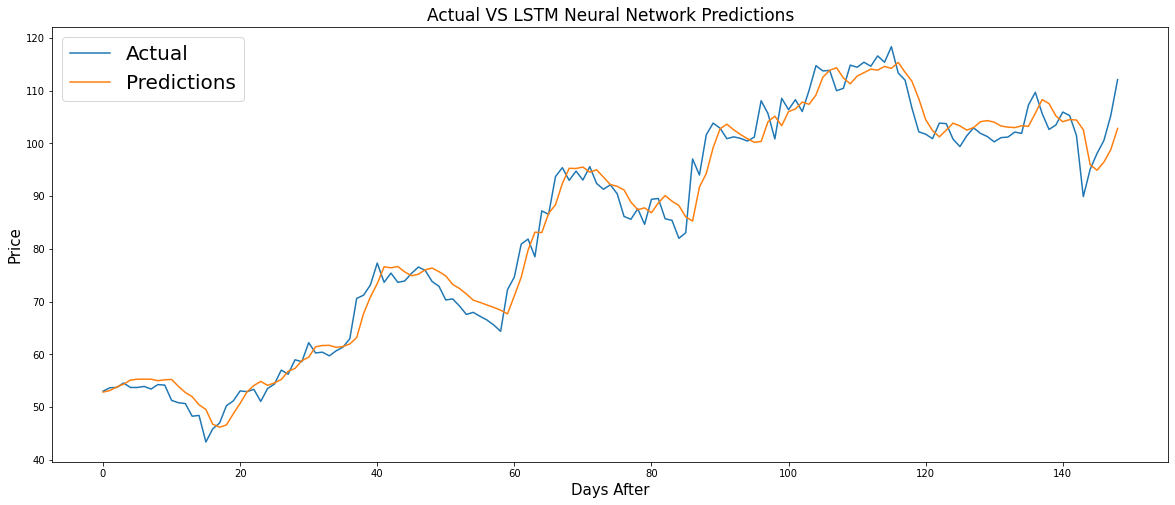

In [70]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(predictions, label='Predictions')
plt.title("Actual VS LSTM Neural Network Predictions", fontsize=17)
plt.xlabel("Days After", fontsize=15) 
plt.ylabel("Price", fontsize=15)
plt.legend(prop = {'size' : 20})
plt.show()

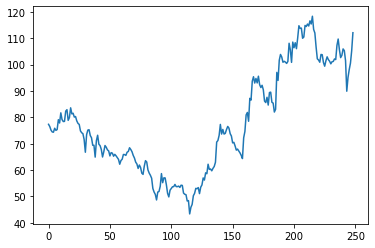

In [71]:
plt.plot(close_prices)

In [72]:
curr_price = close_prices[len(close_prices) - prediction_days:len(close_prices)]

curr_price = np.array(curr_price)
curr_price = scaler.transform(curr_price.reshape(1, -1))

In [73]:
curr_price = np.reshape(curr_price, (curr_price.shape[0], curr_price.shape[1], 1))

In [74]:
next_day_pred = model_rnn.predict(curr_price)
next_day_pred = scaler.inverse_transform(next_day_pred)

1/1 [==============================] - 0s 26ms/step


In [75]:
print(close_prices[len(close_prices) - 1])
print(next_day_pred[0][0])

112.099998
108.42842


In [143]:
pred_prices = []
NUM_OF_FUTURE_DAYS = 60
tot_close_prices = list(close_prices)

# model = load_model("lstm-test-model-v1.1")
for i in range(NUM_OF_FUTURE_DAYS + 1):
    curr_price = tot_close_prices[len(tot_close_prices) - prediction_days: len(tot_close_prices)]
    curr_price = np.array(curr_price, dtype='object')
    curr_price = scaler.transform(curr_price.reshape(1, -1))
    curr_price = np.reshape(curr_price, (curr_price.shape[0], curr_price.shape[1], 1))
    next_day_pred = model_rnn.predict(curr_price)
    next_day_pred = scaler.inverse_transform(next_day_pred)
    pred_prices.append(next_day_pred)
    tot_close_prices.append(next_day_pred)
    curr_price = 0

1/1 [==============================] - 0s 34ms/step


/Users/yashsolanki/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


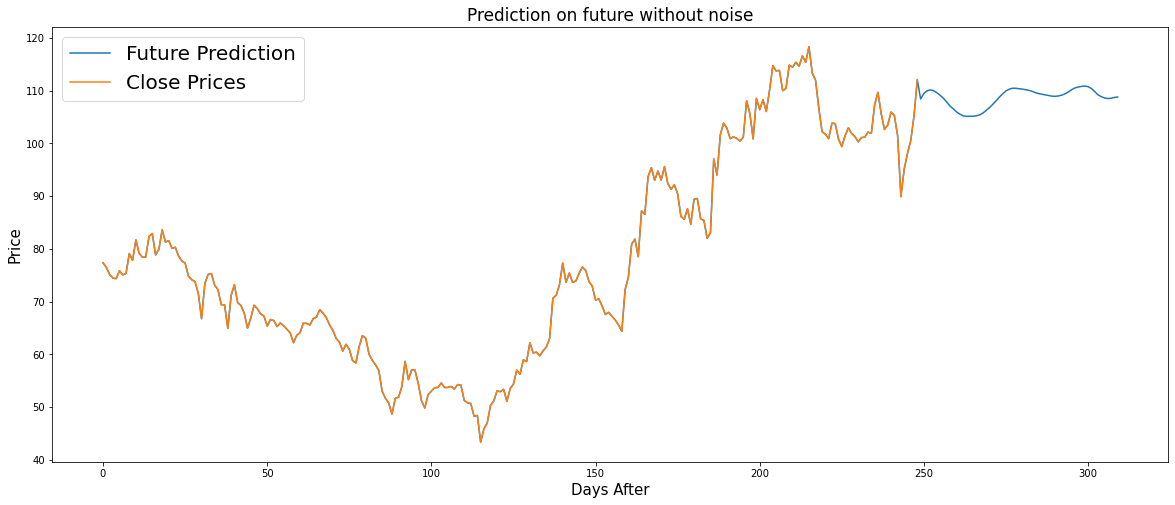

In [144]:
plt.figure(figsize=(20, 8))
plt.plot(tot_close_prices, label='Future Prediction')
plt.plot(close_prices, label='Close Prices')
plt.title("Prediction on future without noise", fontsize=17)
plt.xlabel("Days After", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.legend(prop = {'size' : 20})
plt.show()

## Computing Volitality over the prediction days period of the Stock to implement as noise

In [145]:
volitality_calc_period = 60
price_sum = 0

for i in range(len(close_prices) - volitality_calc_period, len(close_prices)):
    price_sum += close_prices[i]
    
price_avg = price_sum / volitality_calc_period

print(price_avg)

105.65833321666669


In [146]:
diffs = []

for i in range(len(close_prices) - volitality_calc_period, len(close_prices)):
    diffs.append(pow(close_prices[i] - price_avg, 2))

diffs = np.array(diffs)
diffs_sum = np.sum(diffs)

In [147]:
variance = diffs_sum / prediction_days

standard_deviation = math.sqrt(variance)

print(standard_deviation)

5.868241672696493


## Generating noise based on the standard deviation of the data over the specified period

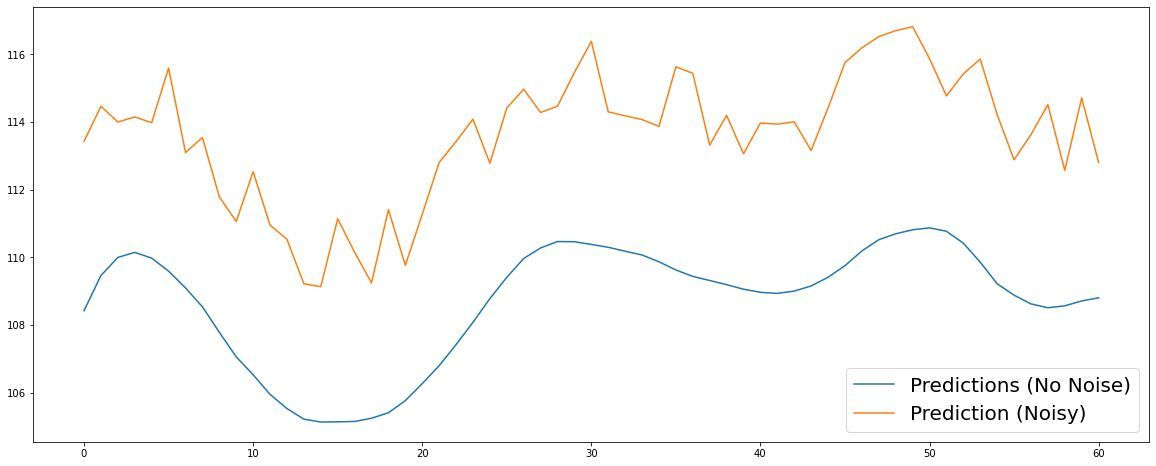

In [152]:
pred_prices_noisy = []
lower_bound = int(round(0.75 * standard_deviation))
for i in range(len(pred_prices)):
    noise = random.randint(lower_bound, round(standard_deviation))
    pred_prices_noisy.append(pred_prices[i] + noise)
    
pred_prices_noisy = np.array(pred_prices_noisy)
pred_prices_noisy = np.reshape(pred_prices_noisy, (pred_prices_noisy.shape[0]))
pred_prices = np.array(pred_prices)
pred_prices = np.reshape(pred_prices, (pred_prices.shape[0]))


plt.figure(figsize=(20, 8))
plt.plot(pred_prices, label='Predictions (No Noise)')
plt.plot(pred_prices_noisy, label='Prediction (Noisy)')
plt.legend(prop = {'size': 20})
plt.show()